In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [2]:
plt.rcParams['axes.facecolor'] = 'bisque'

# FO

### Data collection:-

<b>----26 July</b> 

From SRStockAlertBot (Free channel)

<b>----30 Sept</b>

From SRStockAlertBot_FnO (Paid channel)    +    4 alerts from SRStockAlertBot (not present in SRStockAlertBot_FnO)

<b>----Current</b>

In [3]:
dfcf = pd.read_excel('D:/Yash/Python Projects/tgm_stk_tkr/default/data/Clean/FnO.xlsx')

In [4]:
# total alerts
total_alertsFO = dfcf.shape[0]
total_alertsFO

462

In [5]:
# Total bullish alerts
total_bullFO = dfcf[dfcf.Type=='Bullish'].shape[0]
total_bullFO

352

In [6]:
#Total bearish alerts
total_bearFO = dfcf[dfcf.Type=='Bearish'].shape[0]
total_bearFO

110

In [7]:
#Total stagnant alerts
StagnantFO = dfcf[dfcf.Result=='STAGNANT'].shape[0]
StagnantFO

18

In [8]:
dfcf[dfcf.Result=='STAGNANT'].Type.value_counts()

Bullish    16
Bearish     2
Name: Type, dtype: int64

#### removing OPEN alerts

In [9]:
ons = dfcf[dfcf.Result=='ON'].index # Identify OPEN/ON alerts
len(ons), ons # all will be from current month

(10, Int64Index([0, 1, 2, 3, 4, 5, 6, 8, 12, 14], dtype='int64'))

In [10]:
on_count = dfcf.iloc[ons, :].Type.value_counts()
on_count

Bearish    5
Bullish    5
Name: Type, dtype: int64

In [11]:
dfcf.drop(ons, axis=0, inplace=True) # Drop the ON alerts from analysis
dfcf.shape

(452, 14)

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [12]:
# Total Target achieved and SL Hit alerts
TA = dfcf[dfcf['result dummy']=='Target achieved'].shape[0]
SL = dfcf[dfcf['result dummy']=='SL Hit'].shape[0]
TA, SL

(310, 124)

In [13]:
# Total stagnant alerts
StagnantFO

18

In [14]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bullish') & (dfcf['15DayClose']<dfcf.Price)].shape[0]
p1 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bullish') & (dfcf['15DayClose']>dfcf.Price)].shape[0]

n2 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bearish') & (dfcf['15DayClose']>dfcf.Price)].shape[0]
p2 = dfcf[(dfcf['result dummy']=='STAGNANT') & (dfcf.Type=='Bearish') & (dfcf['15DayClose']<dfcf.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(2, 16)

In [15]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(311.0, 132.0)

In [16]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 70.2, 'SL Hit': 29.8}

Text(0, 0.5, '%')

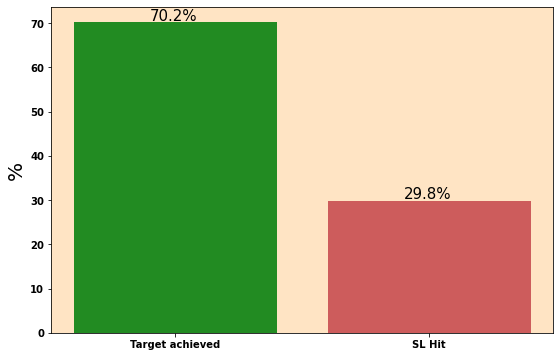

In [17]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

### (T1-T3) intra comparison

Text(0, 0.5, '%')

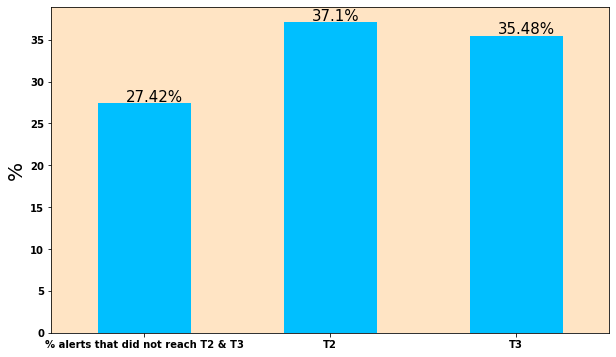

In [18]:
TAstat = dfcf[dfcf.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [19]:
# Avg no. of days needed to reach the highest target
FO_avg_nod = dfcf[dfcf['result dummy']=='Target achieved'].NoD.mean()
FO_avg_nod

5.7290322580645165

### Bullish v/s Bearish alerts

#### Bullish

In [20]:
# Total bullish alerts
bull = dfcf[dfcf.Type=='Bullish']
print(bull.shape[0]) 
try:
    print(f"In actual {total_bullFO}, +{on_count['Bullish']} that were removed as ON alerts")
except:
    print(f"In actual {total_bullFO}")

347
In actual 352, +5 that were removed as ON alerts


In [21]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(236, 95)

In [22]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

16

In [23]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p,n

(2, 14)

In [24]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(237.0, 102.0)

In [25]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 69.91, 'SL Hit': 30.09}

Text(0, 0.5, '%')

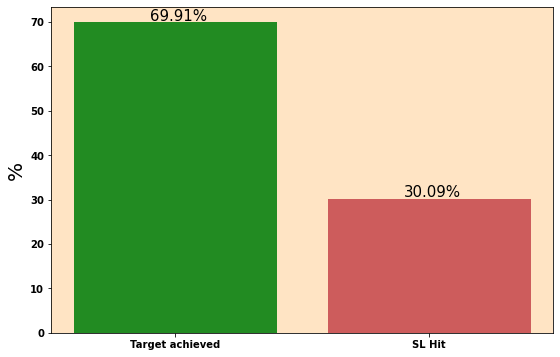

In [26]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [27]:
# Total bearish alerts
bear = dfcf[dfcf.Type=='Bearish']
print(bear.shape[0])
try:
    print(f"In actual {total_bearFO}, +{on_count['Bearish']} that were removed as ON alerts")
except:
    print(f"In actual {total_bearFO}")

105
In actual 110, +5 that were removed as ON alerts


In [28]:
# Total Target achieved and SL Hit alerts in bear df
TA = bear[bear['result dummy']=='Target achieved'].shape[0]
SL = bear[bear['result dummy']=='SL Hit'].shape[0]
TA, SL

(74, 29)

In [29]:
# Total stagnant alerts in bearish alerts
bear[bear['result dummy']=='STAGNANT'].shape[0]

2

In [30]:
# (+)ive & (-)ive STAGNANT alerts in bear df
n = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']>bear.Price)].shape[0]
p = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']<bear.Price)].shape[0]
p,n

(0, 2)

In [31]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(74.0, 30.0)

In [32]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 71.15, 'SL Hit': 28.85}

Text(0, 0.5, '%')

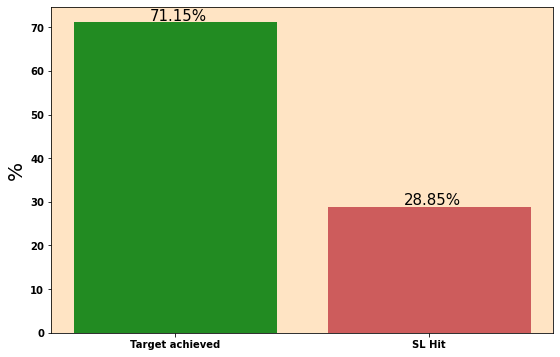

In [33]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

## Monthly Analysis

In [34]:
dfm = dfcf.set_index('Date')

In [35]:
months = []
mos = pd.Series(dfm.index[::-1].to_numpy().astype('datetime64[M]')).unique()
for mo in mos:
    months.append(dt.datetime.date(pd.to_datetime(mo)).strftime(format="%b%y"))

In [36]:
monthly_stats = []
monthlyTA_stats = []
monthly_alerts = []
for i in months:
    month = dt.datetime.strptime(i, "%b%y").month                                               # current_month
    year = dt.datetime.strptime(i, "%b%y").year                                                 # current_year
    end = calendar.monthrange(year, month)[1]                      
    current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df
    
    monthly_alerts.append(current_month.shape[0])                                   # total alerts in current month
    
    # Total Target achieved and SL Hit alerts in current month
    TA = current_month[current_month['result dummy']=='Target achieved'].shape[0]
    SL = current_month[current_month['result dummy']=='SL Hit'].shape[0]
    
    # (+)ive & (-)ive STAGNANT alerts
    n1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']<current_month.Price)].shape[0]
    p1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']>current_month.Price)].shape[0]

    n2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']>current_month.Price)].shape[0]
    p2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']<current_month.Price)].shape[0]

    p = p1 + p2
    n = n1 + n2
    
    # Weightage of 0.5 to TA & SL
    TA += p*0.5
    SL += n*0.5 
    
    current_stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
    monthly_stats.append(current_stat)
    
    TAstat = current_month[current_month.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
    if len(TAstat.index)<3:
        y = ['T1','T2','T3']
        TAstat[list(set(y).difference(set(TAstat.index)))[0]] = 0.0
    TAstat = TAstat.sort_index()
    monthlyTA_stats.append(TAstat)

<ipython-input-36-111b5f5c1586>:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df


### Line chart

In [37]:
line_data = ([x['Target achieved'] for x in monthly_stats]), ([x['SL Hit'] for x in monthly_stats])

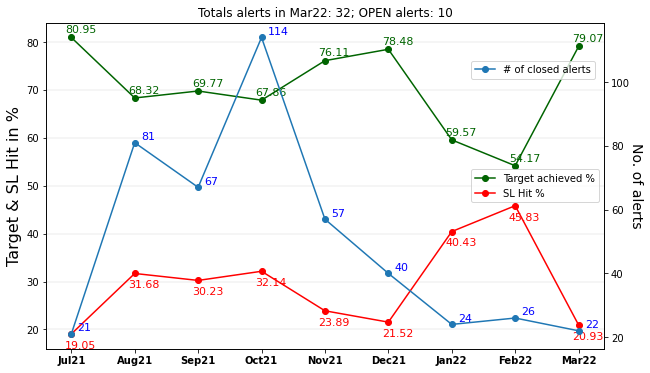

In [38]:
# Including month of july 
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
#ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in {months[-1]}: {monthly_alerts[-1] + len(ons)}; OPEN alerts: {len(ons)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j+1), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-3), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='best', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, monthly_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='best', bbox_to_anchor=(0.993, 0.899), facecolor='white')

for i,j in enumerate(monthly_alerts):
    ax2.annotate(s=j, xy=(i+0.1, j+1), xycoords='data', fontsize=11, color='blue')

Text(0, 0.5, 'alerts that hit T1/T2/T3 in % of Total Target achieved')

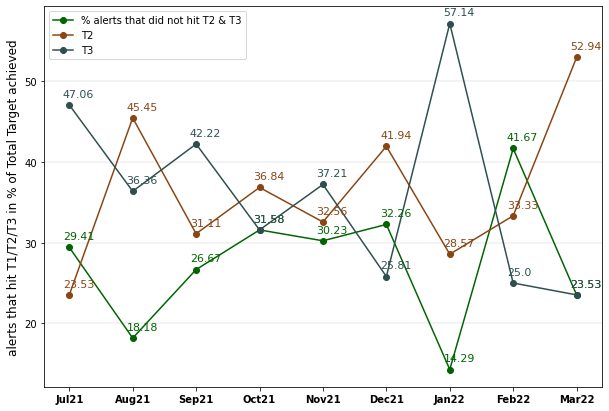

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_facecolor('white')

ax.plot(months, np.array(monthlyTA_stats)[:, 0], marker='o', color='darkgreen')
ax.plot(months, np.array(monthlyTA_stats)[:, 1], marker='o', color='saddlebrown')
ax.plot(months, np.array(monthlyTA_stats)[:, 2], marker='o', color='darkslategrey')
ax.grid(axis='y', lw=0.3)
#ax.set_ylim(0, 100)

for i,j in enumerate(np.array(monthlyTA_stats)):
    ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
    ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
    ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='best', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)

# NCASH

### Data collection:-

<b>----01 Oct</b> 

From SRStockAlertBot (Free channel)

<b>----Current</b>

In [40]:
dfcn = pd.read_excel('D:/Yash/Python Projects/tgm_stk_tkr/default/data/Clean/NCASH.xlsx')

In [41]:
# total alerts
total_alertsNC = dfcn.shape[0]
total_alertsNC

82

In [42]:
# Total bullish alerts
total_bullNC = dfcn[dfcn.Type=='Bullish'].shape[0]
total_bullNC

82

In [43]:
#Total bearish alerts
total_bearNC = dfcn[dfcn.Type=='Bearish'].shape[0]
total_bearNC

0

In [44]:
#Total stagnant alerts
StagnantNC = dfcn[dfcn.Result=='STAGNANT'].shape[0]
StagnantNC

5

In [45]:
dfcn[dfcn.Result=='STAGNANT'].Type.value_counts()

Bullish    5
Name: Type, dtype: int64

#### removing OPEN alerts

In [46]:
ons = dfcn[dfcn.Result=='ON'].index # Identify OPEN/ON alerts
len(ons), ons # all will be from current month

(2, Int64Index([0, 7], dtype='int64'))

In [47]:
on_count = dfcn.iloc[ons, :].Type.value_counts()
on_count

Bullish    2
Name: Type, dtype: int64

In [48]:
dfcn.drop(ons, axis=0, inplace=True) # Drop the ON alerts from analysis
dfcn.shape

(80, 14)

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [49]:
# Total Target achieved and SL Hit alerts
TA = dfcn[dfcn['result dummy']=='Target achieved'].shape[0]
SL = dfcn[dfcn['result dummy']=='SL Hit'].shape[0]
TA, SL

(49, 26)

In [50]:
# Total stagnant alerts
StagnantNC

5

In [51]:
# (+)ive & (-)ive STAGNANT alerts
n1 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bullish') & (dfcn['15DayClose']<dfcn.Price)].shape[0]
p1 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bullish') & (dfcn['15DayClose']>dfcn.Price)].shape[0]

n2 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bearish') & (dfcn['15DayClose']>dfcn.Price)].shape[0]
p2 = dfcn[(dfcn['result dummy']=='STAGNANT') & (dfcn.Type=='Bearish') & (dfcn['15DayClose']<dfcn.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(2, 3)

In [52]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(50.0, 27.5)

In [53]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 64.52, 'SL Hit': 35.48}

Text(0, 0.5, '%')

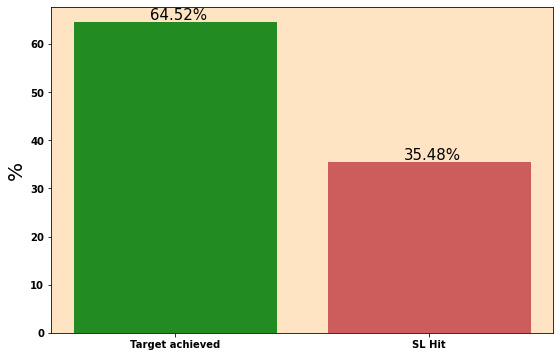

In [54]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### (T1-T3) intra comparison

Text(0, 0.5, '%')

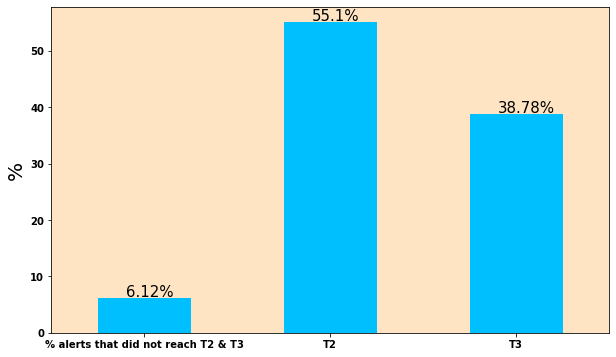

In [55]:
TAstat = dfcn[dfcn.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#plt.grid(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [56]:
# Avg no. of days needed to hit T1
dfcn[dfcn['result dummy']=='Target achieved'].NoD.mean()

5.36734693877551

### Bullish v/s Bearish alerts

#### Bullish

In [57]:
# Total bullish alerts
bull = dfcn[dfcn.Type=='Bullish']
print(bull.shape[0])
try:
    print(f"In actual {total_bullNC}, +{on_count['Bullish']} that were removed as ON alerts")
except:
    print(f"In actual {total_bullNC}")

80
In actual 82, +2 that were removed as ON alerts


In [58]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(49, 26)

In [59]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

5

In [60]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p, n

(2, 3)

In [61]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(50.0, 27.5)

In [62]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 64.52, 'SL Hit': 35.48}

Text(0, 0.5, '%')

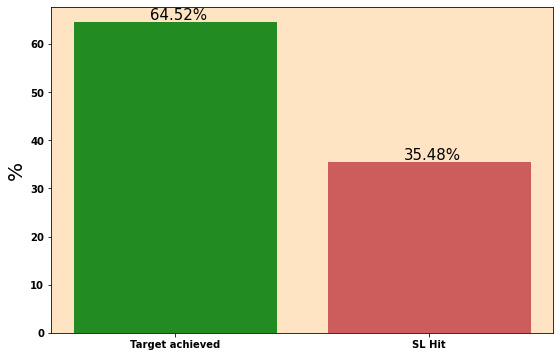

In [63]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#plt.grid(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [64]:
# No bearish alerts generated in Cash_N500 segement
bear = dfcn[dfcn.Type=='Bearish']
bear.shape

(0, 14)

## Monthly Analysis

In [65]:
dfm = dfcn.set_index('Date')

In [66]:
months = []
mos = pd.Series(dfm.index[::-1].to_numpy().astype('datetime64[M]')).unique()
for mo in mos:
    months.append(dt.datetime.date(pd.to_datetime(mo)).strftime(format="%b%y"))

In [67]:
monthly_stats = []
monthlyTA_stats = []
monthly_alerts = []
for i in months:
    month = dt.datetime.strptime(i, "%b%y").month                                               # current_month
    year = dt.datetime.strptime(i, "%b%y").year                                                 # current_year
    end = calendar.monthrange(year, month)[1]                      
    current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df
    
    monthly_alerts.append(current_month.shape[0])                                   # total alerts in current month
    
    # Total Target achieved and SL Hit alerts in current month
    TA = current_month[current_month['result dummy']=='Target achieved'].shape[0]
    SL = current_month[current_month['result dummy']=='SL Hit'].shape[0]
    
    # (+)ive & (-)ive STAGNANT alerts
    n1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']<current_month.Price)].shape[0]
    p1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']>current_month.Price)].shape[0]

    n2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']>current_month.Price)].shape[0]
    p2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']<current_month.Price)].shape[0]

    p = p1 + p2
    n = n1 + n2
    
    # Weightage of 0.5 to TA & SL
    TA += p*0.5
    SL += n*0.5 
    
    current_stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
    monthly_stats.append(current_stat)
    
    TAstat = current_month[current_month.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
    if len(TAstat.index)<3:
        y = ['T1','T2','T3']
        TAstat[list(set(y).difference(set(TAstat.index)))[0]] = 0.0
    TAstat = TAstat.sort_index()
    monthlyTA_stats.append(TAstat)

<ipython-input-67-111b5f5c1586>:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df


### Line chart

In [68]:
line_data = ([x['Target achieved'] for x in monthly_stats]), ([x['SL Hit'] for x in monthly_stats])

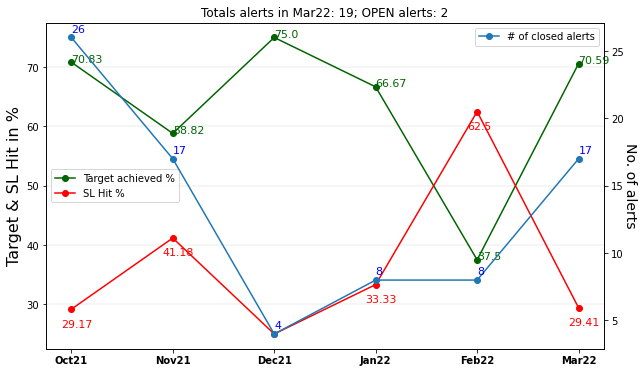

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
#ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in {months[-1]}: {monthly_alerts[-1] + len(ons)}; OPEN alerts: {len(ons)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i, j), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-3), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='center left', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, monthly_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='best', facecolor='white')

for i,j in enumerate(monthly_alerts):
    ax2.annotate(s=j, xy=(i, j+0.4), xycoords='data', fontsize=11, color='blue')

Text(0, 0.5, 'alerts that hit T1/T2/T3 in % of Total Target achieved')

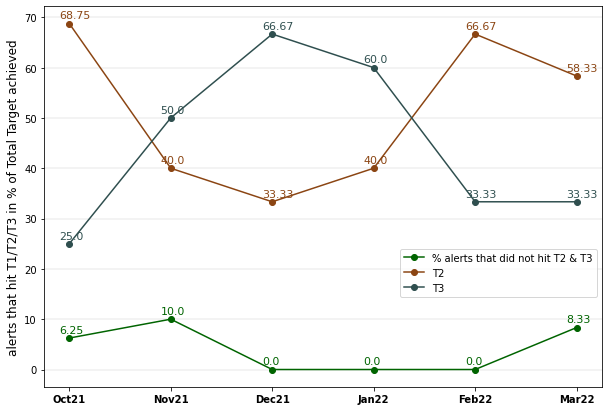

In [70]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_facecolor('white')

ax.plot(months, np.array(monthlyTA_stats)[:, 0], marker='o', color='darkgreen')
ax.plot(months, np.array(monthlyTA_stats)[:, 1], marker='o', color='saddlebrown')
ax.plot(months, np.array(monthlyTA_stats)[:, 2], marker='o', color='darkslategrey')
ax.grid(axis='y', lw=0.3)
#ax.set_ylim(0, 100)

for i,j in enumerate(np.array(monthlyTA_stats)):
    ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
    ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
    ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='right', bbox_to_anchor=(1, 0.3), facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)

# FO & NCASH combined

In [71]:
df = pd.concat([dfcn, dfcf]).reset_index(drop=True).sort_values(by='Date', ascending=False)

In [72]:
print(df.shape[0]) 
total_alerts = total_alertsFO + total_alertsNC
print("In actual, total alerts:", total_alerts)

532
In actual, total alerts: 544


In [73]:
# Total bullish alerts
print(df[df.Type=='Bullish'].shape[0]) 
total_bull = total_bullFO + total_bullNC
print("In actual, total bullish alerts:", total_bull)

427
In actual, total bullish alerts: 434


In [74]:
#Total bearish alerts
print(df[df.Type=='Bearish'].shape[0])
total_bear = total_bearFO + total_bearNC
print("In actual, total bearish alerts:", total_bear)

105
In actual, total bearish alerts: 110


In [75]:
#Total stagnant alerts
total_stagnant = StagnantNC + StagnantFO
total_stagnant

23

In [76]:
df[df.Result=='STAGNANT'].Type.value_counts()

Bullish    21
Bearish     2
Name: Type, dtype: int64

In [77]:
# ON Alerts have already been removed
df[df.Result=='ON'].shape[0]

0

### Target achieved v/s SL Hit chart

#### 0.5 weightage to STAGNANT

In [78]:
# Total Target achieved and SL Hit alerts
TA = df[df['result dummy']=='Target achieved'].shape[0]
SL = df[df['result dummy']=='SL Hit'].shape[0]
TA, SL

(359, 150)

In [79]:
# Total stagnant alerts
total_stagnant

23

In [80]:
# (+)ive & (-)ive STAGNANT alerts
n1 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bullish') & (df['15DayClose']<df.Price)].shape[0]
p1 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bullish') & (df['15DayClose']>df.Price)].shape[0]

n2 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bearish') & (df['15DayClose']>df.Price)].shape[0]
p2 = df[(df['result dummy']=='STAGNANT') & (df.Type=='Bearish') & (df['15DayClose']<df.Price)].shape[0]

p = p1 + p2
n = n1 + n2
p,n

(4, 19)

In [81]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(361.0, 159.5)

In [82]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 69.36, 'SL Hit': 30.64}

Text(0, 0.5, '%')

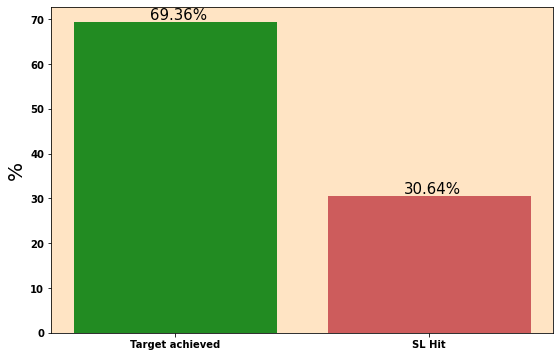

In [83]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

### (T1-T3) intra comparison

Text(0, 0.5, '%')

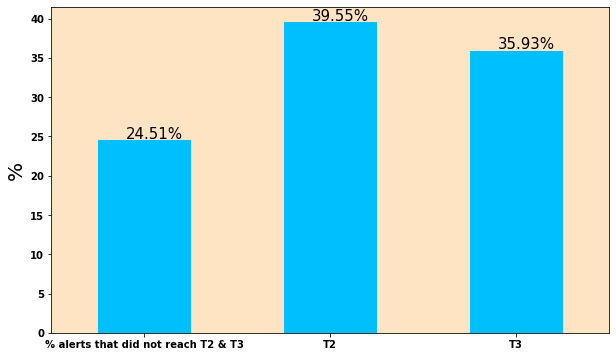

In [84]:
TAstat = df[df.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
TAstat = TAstat.sort_index()

ax = plt.axes()

TAstat.plot(kind='bar', figsize=(10,6), color='deepskyblue')

for i,j in enumerate(TAstat.to_dict()):
    ax.annotate(f"{round(TAstat[j], 2)}%", xy=(i-0.1, TAstat[j]+0.25), xycoords='data', fontsize=15)

#(axis='y', lw=0.5)
ax.set_xticklabels(labels=['% alerts that did not reach T2 & T3', 'T2','T3'])
plt.yticks(fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.ylabel(ylabel='%', fontsize=20)

### Avg NoD

In [85]:
# Avg no. of days needed to reach the highest target
df[df['result dummy']=='Target achieved'].NoD.mean()

5.67966573816156

### Bullish v/s Bearish alerts

#### Bullish

In [86]:
# Total bullish alerts
bull = df[df.Type=='Bullish']
print(bull.shape[0])
print(f"In actual {total_bull}, +{total_bullFO + total_bullNC - bull.shape[0]} that were removed as ON alerts")

427
In actual 434, +7 that were removed as ON alerts


In [87]:
# Total Target achieved and SL Hit alerts in bull df
TA = bull[bull['result dummy']=='Target achieved'].shape[0]
SL = bull[bull['result dummy']=='SL Hit'].shape[0]
TA, SL

(285, 121)

In [88]:
# Total stagnant alerts in Bullish alerts
bull[bull['result dummy']=='STAGNANT'].shape[0]

21

In [89]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']<bull.Price)].shape[0]
p = bull[(bull['result dummy']=='STAGNANT') & (bull['15DayClose']>bull.Price)].shape[0]
p,n

(4, 17)

In [90]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(287.0, 129.5)

In [91]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 68.91, 'SL Hit': 31.09}

Text(0, 0.5, '%')

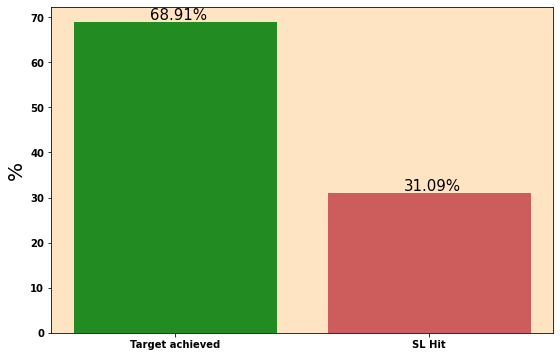

In [92]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

#### Bearish

In [93]:
# Total bearish alerts
bear = df[df.Type=='Bearish']
print(bear.shape[0])
print(f"In actual {total_bear}, +{total_bearFO + total_bearNC - bear.shape[0]} that were removed as ON alerts")

105
In actual 110, +5 that were removed as ON alerts


In [94]:
# Total Target achieved and SL Hit alerts in bear df
TA = bear[bear['result dummy']=='Target achieved'].shape[0]
SL = bear[bear['result dummy']=='SL Hit'].shape[0]
TA, SL

(74, 29)

In [95]:
# Total stagnant alerts in bearish alerts
bear[bear['result dummy']=='STAGNANT'].shape[0]

2

In [96]:
# (+)ive & (-)ive STAGNANT alerts in bull df
n = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']>bear.Price)].shape[0]
p = bear[(bear['result dummy']=='STAGNANT') & (bear['15DayClose']<bear.Price)].shape[0]
p,n

(0, 2)

In [97]:
# Weightage of 0.5 to TA & SL
TA += p*0.5
SL += n*0.5 
TA, SL

(74.0, 30.0)

In [98]:
stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
stat

{'Target achieved': 71.15, 'SL Hit': 28.85}

Text(0, 0.5, '%')

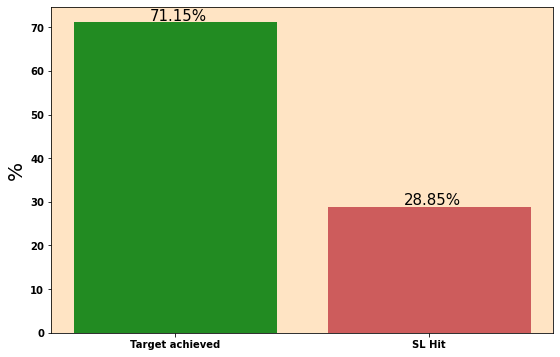

In [99]:
plt.figure(figsize=(9,6))
plt.bar(stat.keys(), stat.values(), color=['forestgreen','indianred'])

for i,j in enumerate(stat):
    plt.annotate(f"{stat[j]}%", xy=(i-0.1, stat[j]+0.5), xycoords='data', fontsize=15)
    

plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')
#(axis='y', lw=0.8)
plt.ylabel(ylabel='%', fontsize=20)

## Monthly Analysis

In [100]:
dfm = df.set_index('Date')

In [101]:
months = []
mos = pd.Series(dfm.index[::-1].to_numpy().astype('datetime64[M]')).unique()
for mo in mos:
    months.append(dt.datetime.date(pd.to_datetime(mo)).strftime(format="%b%y"))

In [102]:
monthly_stats = []
monthlyTA_stats = []
monthly_alerts = []
for i in months:
    month = dt.datetime.strptime(i, "%b%y").month                                               # current_month
    year = dt.datetime.strptime(i, "%b%y").year                                                 # current_year
    end = calendar.monthrange(year, month)[1]                      
    current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df
    
    monthly_alerts.append(current_month.shape[0])                                   # total alerts in current month
    
    # Total Target achieved and SL Hit alerts in current month
    TA = current_month[current_month['result dummy']=='Target achieved'].shape[0]
    SL = current_month[current_month['result dummy']=='SL Hit'].shape[0]
    
    # (+)ive & (-)ive STAGNANT alerts
    n1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']<current_month.Price)].shape[0]
    p1 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bullish') & (current_month['15DayClose']>current_month.Price)].shape[0]

    n2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']>current_month.Price)].shape[0]
    p2 = current_month[(current_month['result dummy']=='STAGNANT') & (current_month.Type=='Bearish') & (current_month['15DayClose']<current_month.Price)].shape[0]

    p = p1 + p2
    n = n1 + n2
    
    # Weightage of 0.5 to TA & SL
    TA += p*0.5
    SL += n*0.5 
    
    current_stat = {'Target achieved':round(TA/(TA+SL)*100, 2), 'SL Hit':round(SL/(TA+SL)*100,2)}
    monthly_stats.append(current_stat)
    
    TAstat = current_month[current_month.Result.isin(['T1','T2','T3'])].Result.value_counts(normalize=True) * 100
    if len(TAstat.index)<3:
        y = ['T1','T2','T3']
        TAstat[list(set(y).difference(set(TAstat.index)))[0]] = 0.0
    TAstat = TAstat.sort_index()
    monthlyTA_stats.append(TAstat)

<ipython-input-102-111b5f5c1586>:8: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  current_month = dfm.loc[f"{year}-{month}-01":f"{year}-{month}-{end}"]                  # get that month's df


### Line chart

In [103]:
line_data = ([x['Target achieved'] for x in monthly_stats]), ([x['SL Hit'] for x in monthly_stats])

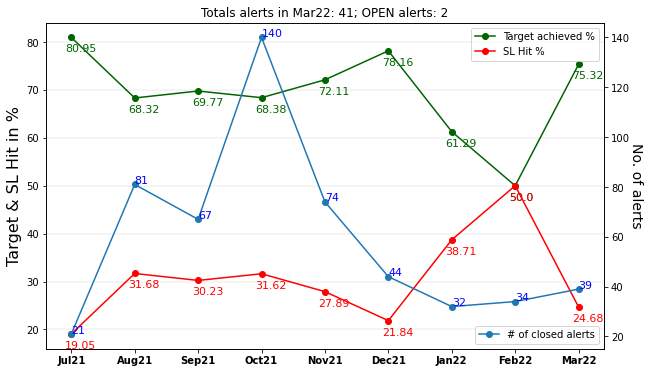

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('white')

ax.plot(months, line_data[0], marker='o', color='darkgreen')
ax.plot(months, line_data[1], marker='o', color='red')
ax.grid(axis='y', lw=0.25)
#ax.set_ylim(0, 100)
ax.set_title(f'Totals alerts in {months[-1]}: {monthly_alerts[-1] + len(ons)}; OPEN alerts: {len(ons)}')

for i,j in enumerate(line_data[0]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-3), xycoords='data', fontsize=11, color='darkgreen')
    
for i,j in enumerate(line_data[1]):
    ax.annotate(s=f'{round(j,2)}', xy=(i-0.1, j-3), xycoords='data', fontsize=11, color='red')

ax.legend(['Target achieved %', 'SL Hit %'], loc='best', facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('Target & SL Hit in %', fontsize=16)

ax2 = ax.twinx()
ax2.plot(months, monthly_alerts, marker='o')
ax2.set_ylabel('No. of alerts', fontsize=14, rotation=-90, labelpad=13)
ax2.legend(labels=['# of closed alerts'], loc='lower right', facecolor='white')

for i,j in enumerate(monthly_alerts):
    ax2.annotate(s=j, xy=(i, j+0.4), xycoords='data', fontsize=11, color='blue')

Text(0, 0.5, 'alerts that hit T1/T2/T3 in % of Total Target achieved')

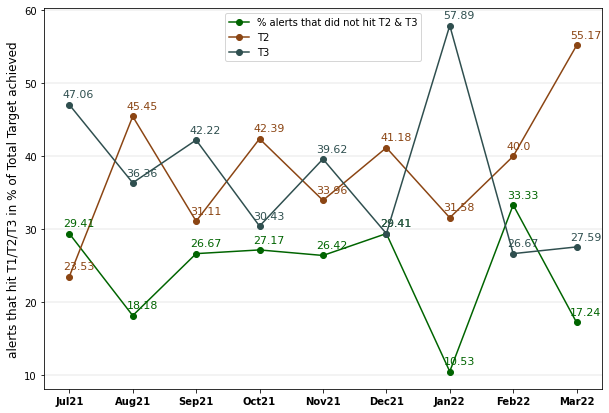

In [105]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_facecolor('white')

ax.plot(months, np.array(monthlyTA_stats)[:, 0], marker='o', color='darkgreen')
ax.plot(months, np.array(monthlyTA_stats)[:, 1], marker='o', color='saddlebrown')
ax.plot(months, np.array(monthlyTA_stats)[:, 2], marker='o', color='darkslategrey')
ax.grid(axis='y', lw=0.3)
#ax.set_ylim(0, 100)

for i,j in enumerate(np.array(monthlyTA_stats)):
    ax.annotate(s=f'{round(j[0],2)}', xy=(i-0.1, j[0]+1), xycoords='data', fontsize=11, color='darkgreen')
    ax.annotate(s=f'{round(j[1],2)}', xy=(i-0.1, j[1]+1), xycoords='data', fontsize=11, color='saddlebrown')    
    ax.annotate(s=f'{round(j[2],2)}', xy=(i-0.1, j[2]+1), xycoords='data', fontsize=11, color='darkslategrey')  
    
ax.legend(['% alerts that did not hit T2 & T3', 'T2', 'T3'], loc='upper center', bbox_to_anchor=(0.5, 1), facecolor='white')
ax.set_xticklabels(labels = months, fontweight='bold')
ax.set_ylabel('alerts that hit T1/T2/T3 in % of Total Target achieved', fontsize=12)